### Problem Statement:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### QN 1 Read the data as an appropriate Time Series data and plot the data.

In [1]:
# For Data Manipulations
import numpy as np # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis
import random as rd # generating random numbers
import datetime # manipulating date formats

# for vissualisation
import matplotlib.pyplot as plt # for basic plots
plt.style.use('fivethirtyeight') 
%matplotlib inline
import seaborn as sns # for pretter plots
from statsmodels.graphics.tsaplots import month_plot
from pylab import rcParams

# Decompose Time series
from statsmodels.tsa.seasonal import seasonal_decompose
# Train Test Split
from sklearn.model_selection import TimeSeriesSplit

# Smoothing
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing,Holt

# Regressions
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

# TIME SERIES
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

#Evaluation Measure
from sklearn import metrics
import statsmodels.tools.eval_measures as em
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Setting
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [4]:
# Checking the Data set
df.head(5)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [5]:
# Checking the shape of Data
print('Shape of Rose a TS Data :',df.shape)

Shape of Rose a TS Data : (187, 1)


In [6]:
# Dataset Informations
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


##### Insight:
Out of 187 entries only 185 are present in row hence its assumed that Two TS value are missing.\
Data TS range is 1980-01-01 to 1995-07-01

In [7]:
# Plotting of Data
rcParams['figure.figsize'] = 12,4

#### Yearly Boxplot

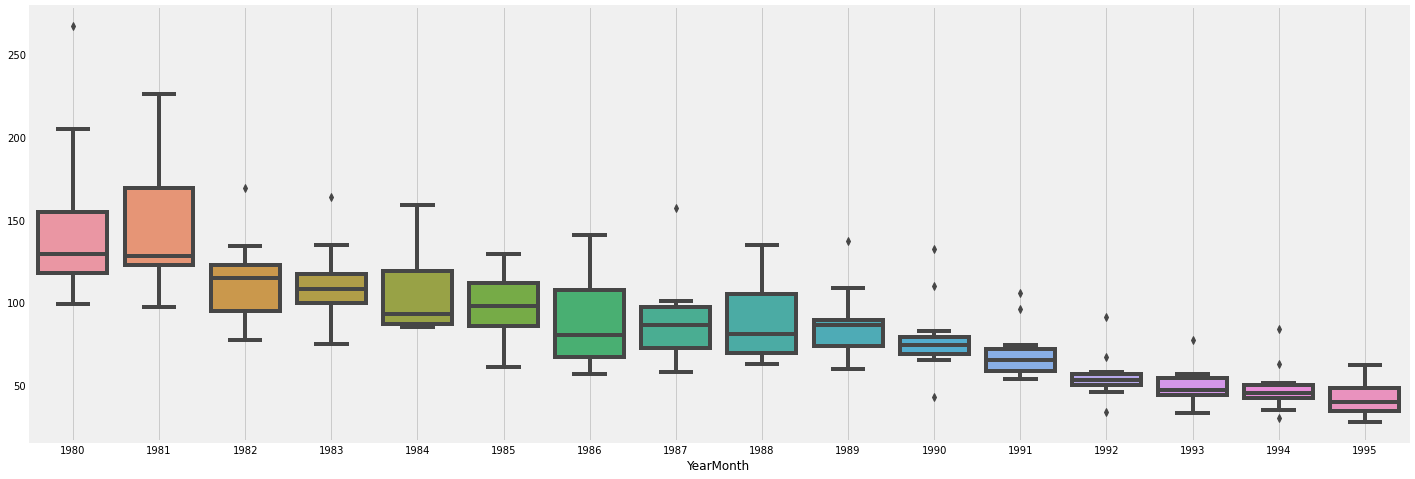

In [8]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

##### Monthly Boxplot

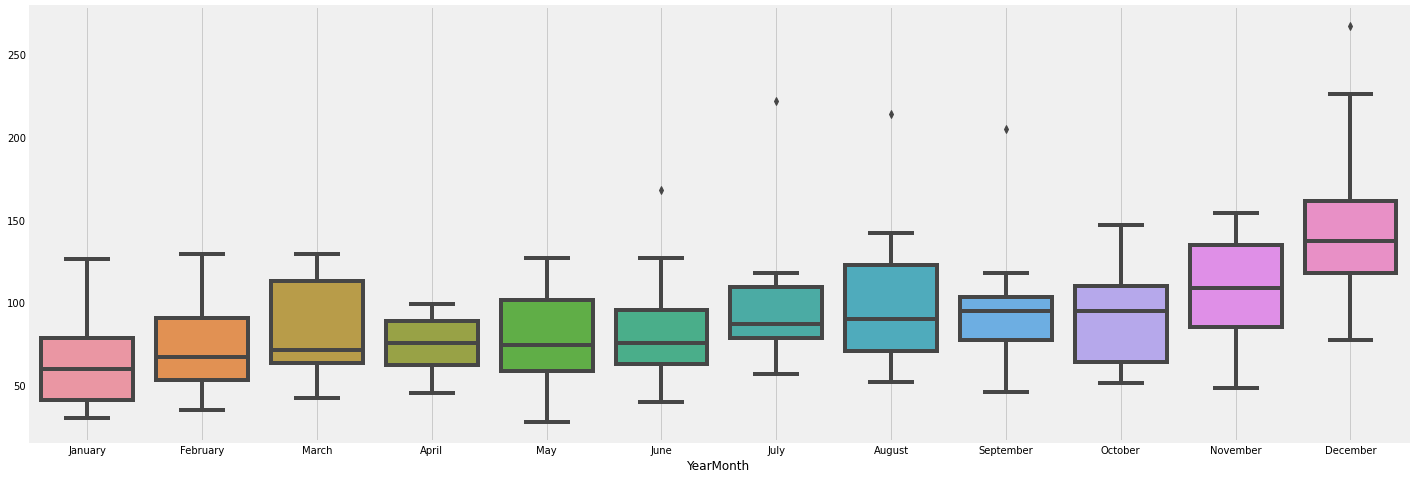

In [9]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.grid();

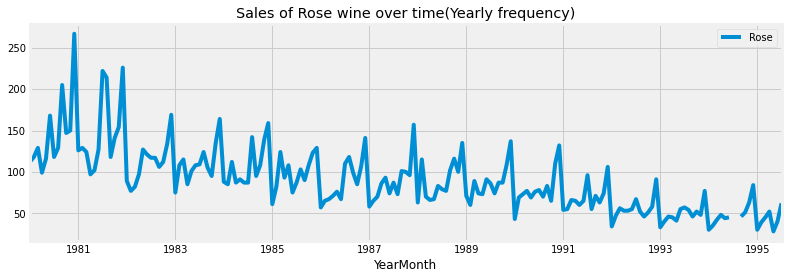

In [10]:
# Plotting of Data
rcParams['figure.figsize'] = 12,4
df.plot()
plt.title('Sales of Rose wine over time(Yearly frequency)')
plt.show();

###### Insights:
1.The Time series data showing the sales of Rose wine TS data showing some Missing values in year 1994.\
2.There is year after year sales degrowing till last available data record.\
3.The maximum sales was in year 1981  while the minimum sales was in 1995.\
4.The sales are in range of above 250 to lowest less than 50.\
5.Seasonality  year wise can be well display by plot.

### QN2 Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Exploratory Data Analysis

In [11]:
# Five fold summary of dataset
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


##### Insights: 
1.There is  low difference in mean and median and data seems NO skewed.\
2.There is low gap between mean sales and median sales, which can be infer as datas are in normal distribution .

#### Missing Values detection

In [12]:
# Checking the Null values in dataset
df.isnull().sum()

Rose    2
dtype: int64

#### Treatment of Missing Values by Interpolate function of pandas	


In [13]:
 # Interpolate Missing Values But Only Up Two Values   
df = df.interpolate(limit=2, limit_direction='forward');
print(); print(df)


             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


In [14]:
#### Dataset check after Null Values Treatment
df.isnull().sum()

Rose    0
dtype: int64

###### Insight:
1.There is two missing value has been detected in TS data in Year 1994.\
2.This has been filled by interpolation method to go further in modeling. 

### Decomposition of Rose

These are the components of a time series

Trend - Consistent upwards or downwards slope of a time series\
Seasonality - Clear periodic pattern of a time series(like sine funtion)\
Noise/Error - Outliers or missing values
   White noise has...

Constant mean
Constant variance
Zero auto-correlation at all lags

#### Multiplicative Decomposition
1.An Multiplicative model suggests that the components are multipled together.\
2.An Multiplicative model is non-linear such as quadratic or exponential.\
3.Changes increase or decrease over time.\
4.A non-linear seasonality has an increasing or decreasing frequency (width of the cycles) and / or amplitude (height of the cycles) over time.

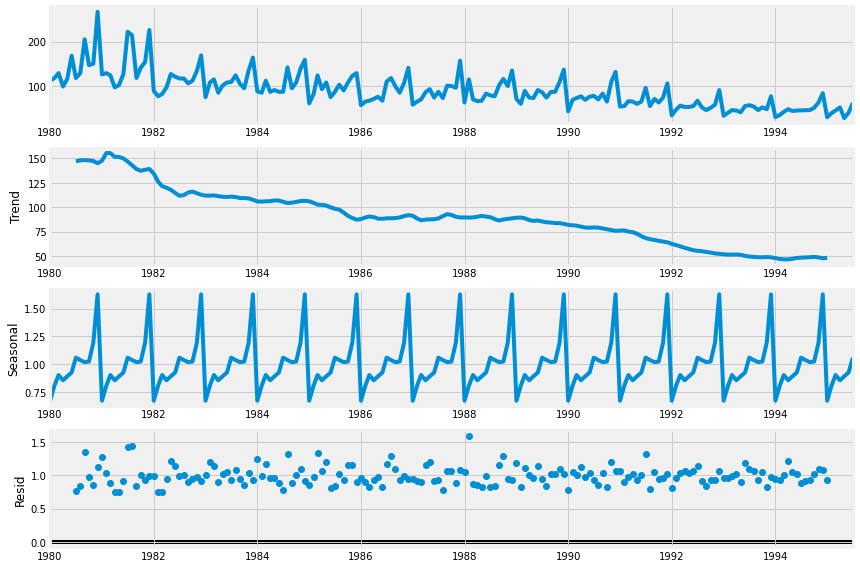

In [15]:
# Decomposition of Wine sales model Multiplicative
rcParams['figure.figsize'] = 12,8
decomposition = seasonal_decompose(df,model='multiplicative',period=12)
decomposition.plot();

#### Additive Decomposition
An additive model suggests that the components are added together.\
An additive model is linear where changes over time are consistently made by the same amount.\
A linear seasonality has the same frequency (width of the cycles) and amplitude (height of the cycles).

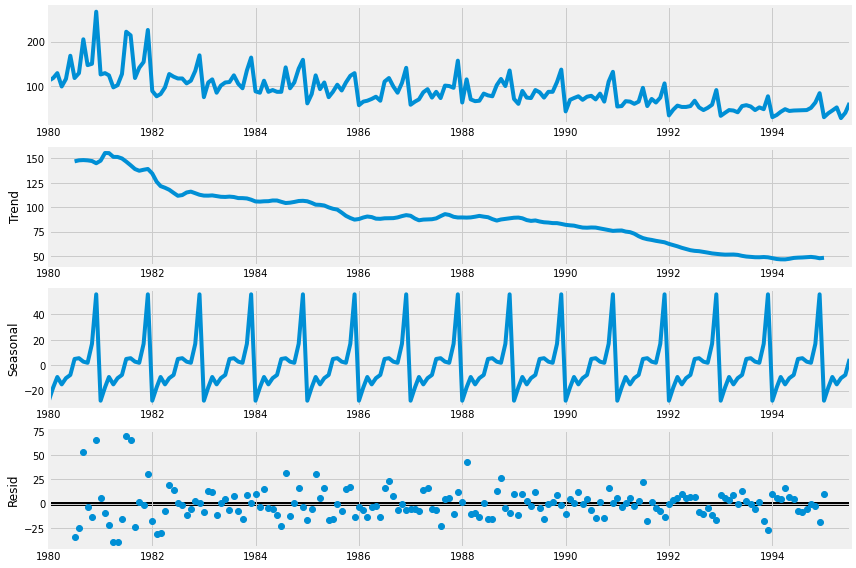

In [16]:
# Decomposition of Wine sales Model Additive
rcParams['figure.figsize'] = 12,8
decomposition = seasonal_decompose(df,model='additive',period=12)
decomposition.plot();

In [17]:
#Let's try to do log transformation
df_log = df.copy()

In [18]:
df_log['Rose'] = np.log(df)

In [19]:
df_log.Rose

YearMonth
1980-01-01    4.718499
1980-02-01    4.770685
1980-03-01    4.859812
1980-04-01    4.595120
1980-05-01    4.753590
                ...   
1995-03-01    3.806662
1995-04-01    3.951244
1995-05-01    3.332205
1995-06-01    3.688879
1995-07-01    4.127134
Name: Rose, Length: 187, dtype: float64

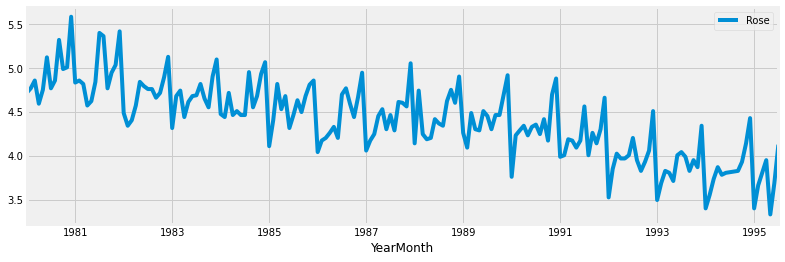

In [20]:
#Visualize the log transformed series
rcParams['figure.figsize'] = 12,4
df_log.plot()
plt.show()

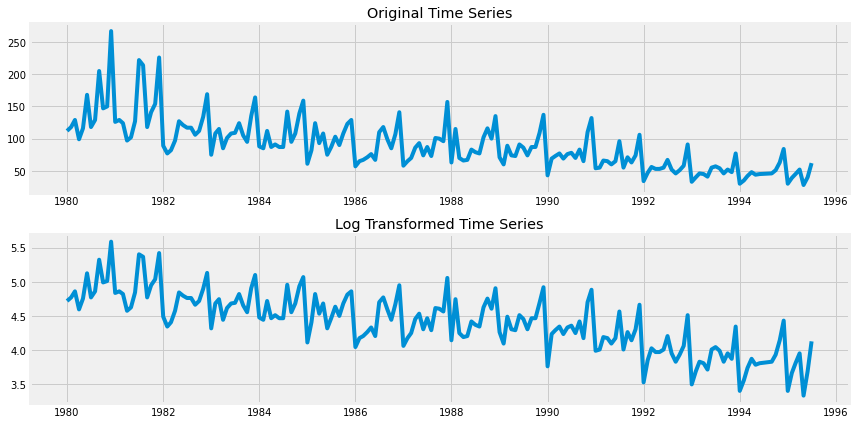

In [21]:
#Compare with the original series with Log series
rcParams['figure.figsize'] = 12,6
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

#### Insights:
Some of our key observations from Decomposition plots:\
1.Multiplicative model is more effective over additive model to elaborate the time series dataset.\
2.Running the above code performs the decomposition, and plots the 4 resulting series.\
3.We observe that the trend and seasonality are clearly separated.\
4.Trend: The year wise data in plot follow the sharp Decreasing sales trend,it can be considered as Degrowth of Rose sales.\
5.Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern.\
6.The Multiplicative model are performing better in decomposition because the residual are more align to center line.\
7.The sale of Rose touches the bottom in year of 1995 as continuous downward trend.

### QN3.Split the data into training and test. The test data should start in 1991.

### Train Test Splite
Before a forecast method is proposed, the method needs to be validated. For that purpose, data has to 
be split into two sets i.e. training and testing. Training data helps in identifying and fitting right model(s) 
and test data is used to validate the same.\
In case of time series data, the test data is the most recent part of the series so that the ordering in the 
data is preserved.

In [22]:
#Spliting the data into training and testing
Train = df[df.index.year < 1991]
Test = df[df.index.year >= 1991]

In [23]:
# Printing the Sparkling Data
print('Training Data')
display(Train)
print('Test Data')
display(Test)

Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0


Test Data


,Rose
YearMonth,
1991-01-01,54.000000
1991-02-01,55.000000
1991-03-01,66.000000
1991-04-01,65.000000
1991-05-01,60.000000
1991-06-01,65.000000
1991-07-01,96.000000
1991-08-01,55.000000
1991-09-01,71.000000


In [24]:
#Checking Shape of data
print('Shape of Rose data of Train Dataset :', Train.shape) 
print('Shape of Rose data of Test Dataset  :', Test.shape) 


Shape of Rose data of Train Dataset : (132, 1)
Shape of Rose data of Test Dataset  : (55, 1)


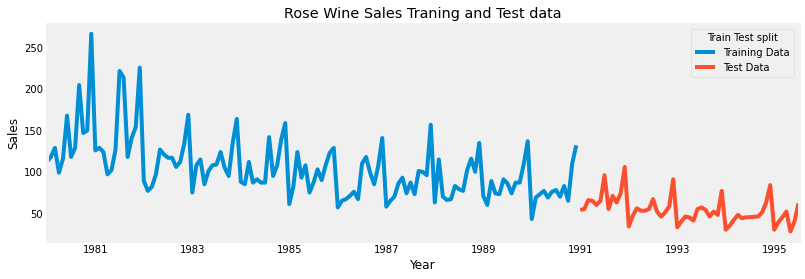

In [25]:
#Plotting the train and test Dataset
rcParams['figure.figsize']=12,4
Train['Rose'].plot()
Test['Rose'].plot()
plt.grid()
plt.title('Rose Wine Sales Traning and Test data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'],title='Train Test split');

##### Insights:
1.The Train datset has (132, 1) values while the test data set has (55, 1) valriables.\
2.The bicolour plot showing the differentiation of Train and Test split.

### QN4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Exponential Smoothing Method
Smoothing is a technique applied to time series to remove the fine-grained variation between time steps.

Exponential smoothing is a time series forecasting method for univariate data.Exponential smoothing forecasting methods consist of flattening time series data and are similar in that a prediction is a weighted sum of past observations,Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.

Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

There are three main types of exponential smoothing time series forecasting methods.


####  SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
A simple method that assumes no systematic structure, an extension that explicitly handles trends, and the most advanced approach that add support for seasonality.

Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

           Ŷt+1 = 𝛼𝑌𝑡+𝛼(1−𝛼)𝑌𝑡−1+𝛼(1−𝛼)2𝑌𝑡−1+⋯, 0<𝛼<1

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially.\
Alpha is often set to a value between 0 and 1.\
Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [26]:
# create class
model_SES = SimpleExpSmoothing(Train,initialization_method='estimated')

In [27]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [28]:
## Checking the parameters
model_SES_autofit.params

{'smoothing_level': 0.09874963957110783,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38708961485827,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(Test))
SES_predict

1991-01-01    87.104992
1991-02-01    87.104992
1991-03-01    87.104992
1991-04-01    87.104992
1991-05-01    87.104992
1991-06-01    87.104992
1991-07-01    87.104992
1991-08-01    87.104992
1991-09-01    87.104992
1991-10-01    87.104992
1991-11-01    87.104992
1991-12-01    87.104992
1992-01-01    87.104992
1992-02-01    87.104992
1992-03-01    87.104992
1992-04-01    87.104992
1992-05-01    87.104992
1992-06-01    87.104992
1992-07-01    87.104992
1992-08-01    87.104992
1992-09-01    87.104992
1992-10-01    87.104992
1992-11-01    87.104992
1992-12-01    87.104992
1993-01-01    87.104992
1993-02-01    87.104992
1993-03-01    87.104992
1993-04-01    87.104992
1993-05-01    87.104992
1993-06-01    87.104992
1993-07-01    87.104992
1993-08-01    87.104992
1993-09-01    87.104992
1993-10-01    87.104992
1993-11-01    87.104992
1993-12-01    87.104992
1994-01-01    87.104992
1994-02-01    87.104992
1994-03-01    87.104992
1994-04-01    87.104992
1994-05-01    87.104992
1994-06-01    87

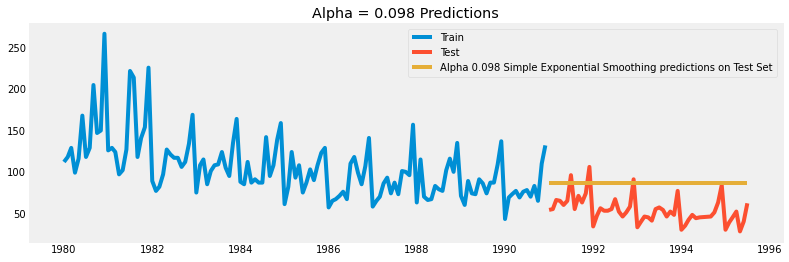

In [30]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha 0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.098 Predictions');

Insights:\
The simple Exponantial model predicting the straigth line, which does not support the lavel. \
So this model would not work.

In [31]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [32]:
print('SES RMSE:',mean_squared_error(Test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
#print('SES RMSE (calculated using statsmodels):',em.rmse(Test.values,SES_predict.values)[0])

SES RMSE: 36.796235605069505


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(Test.values,SES_predict.values)[0]]},index=['Alpha=0.098,SES'])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236


#### Double Exponential Smoothing  or Holt - ETS(A, A, N) - Holt's linear method with additive errors 
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.

        Forecast equation : Ŷ𝑡+1=𝑙𝑡+𝑏𝑡
        Level Equation : 𝑙𝑡=𝛼𝑌𝑡+𝛼(1−𝛼)𝑌𝑡−1, 0 < 𝛼 < 1
        Trend Equation : 𝑏𝑡=𝛽(𝑙𝑡−𝑙𝑡−1)+(1−𝛽)𝑏𝑡−1, 0 < 𝛽 < 1
        where, 𝑙𝑡 is the estimate of level and 𝑏𝑡 is the trend estimate.
        𝛼is the smoothing parameter for the level and 𝛽 is the smoothing parameter for trend.

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).

The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model, named for the developer of the method Charles Holt.

Additive Trend: Double Exponential Smoothing with a linear trend.
Multiplicative Trend: Double Exponential Smoothing with an exponential trend.
For longer range (multi-step) forecasts, the trend may continue on unrealistically. As such, it can be useful to dampen the trend over time.

     Hyperparameters:

        Alpha: Smoothing factor for the level.
        Beta: Smoothing factor for the trend.
        Trend Type: Additive or multiplicative.
        Dampen Type: Additive or multiplicative.
        Phi: Damping coefficient.


In [34]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(Train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('-----Holt model Exponential Smoothing Estimated Parameters ---')
print('')
print(model_DES.params)


-----Holt model Exponential Smoothing Estimated Parameters ---

{'smoothing_level': 1.4901247095597348e-08, 'smoothing_trend': 7.3896641488640725e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81551313502814, 'initial_trend': -0.4943777717865305, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [35]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(Test))
DES_predict

1991-01-01    72.063269
1991-02-01    71.568892
1991-03-01    71.074514
1991-04-01    70.580136
1991-05-01    70.085758
1991-06-01    69.591381
1991-07-01    69.097003
1991-08-01    68.602625
1991-09-01    68.108247
1991-10-01    67.613870
1991-11-01    67.119492
1991-12-01    66.625114
1992-01-01    66.130736
1992-02-01    65.636358
1992-03-01    65.141981
1992-04-01    64.647603
1992-05-01    64.153225
1992-06-01    63.658847
1992-07-01    63.164470
1992-08-01    62.670092
1992-09-01    62.175714
1992-10-01    61.681336
1992-11-01    61.186959
1992-12-01    60.692581
1993-01-01    60.198203
1993-02-01    59.703825
1993-03-01    59.209447
1993-04-01    58.715070
1993-05-01    58.220692
1993-06-01    57.726314
1993-07-01    57.231936
1993-08-01    56.737559
1993-09-01    56.243181
1993-10-01    55.748803
1993-11-01    55.254425
1993-12-01    54.760047
1994-01-01    54.265670
1994-02-01    53.771292
1994-03-01    53.276914
1994-04-01    52.782536
1994-05-01    52.288159
1994-06-01    51

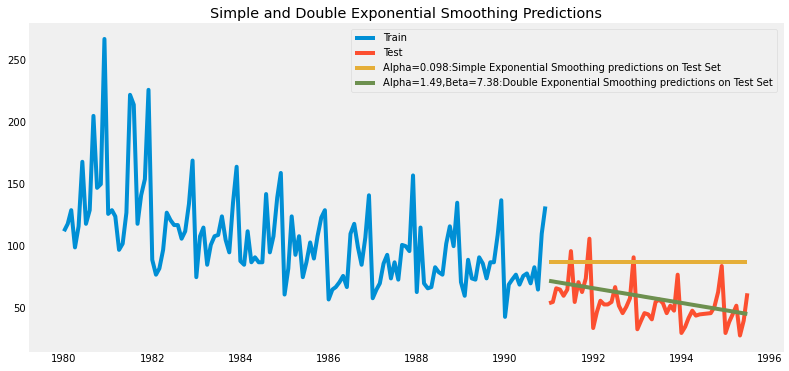

In [36]:
## Plotting the Training data, Test data and the forecasted values
rcParams['figure.figsize'] = 12,6
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49,Beta=7.38:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');


##### Model Accuracy

In [37]:
print('SES RMSE (calculated using statsmodels):',em.rmse(Test.values,DES_predict.values)[0])

SES RMSE (calculated using statsmodels): 24.081702453785567


In [38]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1.49,Beta=7.38:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957


#### Triple Exponential Smoothing or Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors
Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

        This is an extension of Holt’s method when seasonality is found in the data.
        Forecast equation:Y𝑡+1=𝑙𝑡+𝑏𝑡+𝑠𝑡−𝑚(𝑘+1)
        Level Equation:𝑙𝑡=𝛼(𝑌𝑡−𝑠𝑡−𝑚)+𝛼(1−𝛼)𝑌𝑡−1, 0 < 𝛼 < 1
        Trend Equation:𝑏𝑡=𝛽(𝑙𝑡−𝑙𝑡−1)+(1−𝛽)𝑏𝑡−1, 0 < 𝛽 < 1
        Seasonal Equation: 𝛾(𝑌𝑡−𝑙𝑡−1−𝑏𝑡−1)+(1−𝛾)𝑠𝑡−𝑚, 0 < 𝛾 < 1
        This is also known as three parameters exponential or triple exponential because of the three 
        smoothing parameters 𝛼, 𝛽 and 𝛾. This is a general method and a true multi-step ahead forecast. 


In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

As with the trend, the seasonality may be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

Additive Seasonality: Triple Exponential Smoothing with a linear seasonality.
Multiplicative Seasonality: Triple Exponential Smoothing with an exponential seasonality.
Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.

This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

      Hyperparameters:

        Alpha: Smoothing factor for the level.
        Beta: Smoothing factor for the trend.
        Gamma: Smoothing factor for the seasonality.
        Trend Type: Additive or multiplicative.
        Dampen Type: Additive or multiplicative.
        Phi: Damping coefficient.
        Seasonality Type: Additive or multiplicative.
        Period: Time steps in seasonal period.


In [39]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(Train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('---Holt Winters model Exponential Smoothing Estimated Parameters----')
print('')
print(model_TES.params)


---Holt Winters model Exponential Smoothing Estimated Parameters----

{'smoothing_level': 0.09467987567540882, 'smoothing_trend': 2.31999683285252e-05, 'smoothing_seasonal': 0.0004175285691922314, 'damping_trend': nan, 'initial_level': 146.40142527639352, 'initial_trend': -0.5464913833622084, 'initial_seasons': array([-31.19268548, -18.83344765, -10.84745053, -21.48718886,
       -12.67654312,  -7.19154248,   2.65454402,   8.80233514,
         4.79913097,   2.91389547,  21.00157004,  63.18716583]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [40]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(Test))
TES_predict

1991-01-01     42.716117
1991-02-01     54.528923
1991-03-01     61.968476
1991-04-01     50.782306
1991-05-01     59.046436
1991-06-01     63.984756
1991-07-01     73.284643
1991-08-01     78.885632
1991-09-01     74.336035
1991-10-01     71.904228
1991-11-01     89.445446
1991-12-01    131.087464
1992-01-01     36.158278
1992-02-01     47.971084
1992-03-01     55.410637
1992-04-01     44.224467
1992-05-01     52.488597
1992-06-01     57.426917
1992-07-01     66.726804
1992-08-01     72.327793
1992-09-01     67.778196
1992-10-01     65.346389
1992-11-01     82.887606
1992-12-01    124.529625
1993-01-01     29.600439
1993-02-01     41.413245
1993-03-01     48.852798
1993-04-01     37.666628
1993-05-01     45.930758
1993-06-01     50.869078
1993-07-01     60.168965
1993-08-01     65.769954
1993-09-01     61.220357
1993-10-01     58.788550
1993-11-01     76.329767
1993-12-01    117.971785
1994-01-01     23.042600
1994-02-01     34.855406
1994-03-01     42.294959
1994-04-01     31.108789


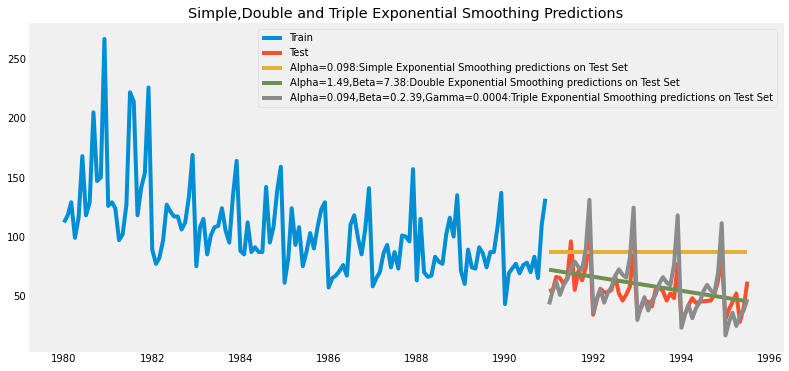

In [41]:
## Plotting the Training data, Test data and the forecasted values
rcParams['figure.figsize'] = 12,6
plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49,Beta=7.38:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.094,Beta=0.2.39,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');


##### Model Accuracy

In [42]:
print('TES RMSE:',mean_squared_error(Test.values,TES_predict.values,squared=False))

TES RMSE: 14.278440376982086


In [43]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440


##### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method
 ETS(A, A, M) model

In [44]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(Train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('----Holt Winters model Exponential Smoothing Estimated Parameters---')
print('')
print(model_TES_am.params)


----Holt Winters model Exponential Smoothing Estimated Parameters---

{'smoothing_level': 0.07130285749243212, 'smoothing_trend': 0.04550837652110988, 'smoothing_seasonal': 8.385716703273524e-05, 'damping_trend': nan, 'initial_level': 163.60092654560762, 'initial_trend': -0.9804841883026134, 'initial_seasons': array([0.68714163, 0.77936108, 0.85184662, 0.74446365, 0.8372947 ,
       0.91182237, 1.00282327, 1.06745268, 1.01025249, 0.98957378,
       1.1535151 , 1.59037115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(Test))
TES_predict_am

1991-01-01     56.332862
1991-02-01     63.693063
1991-03-01     69.394575
1991-04-01     60.454513
1991-05-01     67.772390
1991-06-01     73.563907
1991-07-01     80.645116
1991-08-01     85.563629
1991-09-01     80.718288
1991-10-01     78.808929
1991-11-01     91.565566
1991-12-01    125.823875
1992-01-01     54.185254
1992-02-01     61.257120
1992-03-01     66.732091
1992-04-01     58.127595
1992-05-01     65.155411
1992-06-01     70.714123
1992-07-01     77.510896
1992-08-01     82.227449
1992-09-01     77.560771
1992-10-01     75.716019
1992-11-01     87.960222
1992-12-01    120.853321
1993-01-01     52.037646
1993-02-01     58.821176
1993-03-01     64.069608
1993-04-01     55.800678
1993-05-01     62.538432
1993-06-01     67.864338
1993-07-01     74.376675
1993-08-01     78.891269
1993-09-01     74.403254
1993-10-01     72.623110
1993-11-01     84.354879
1993-12-01    115.882766
1994-01-01     49.890039
1994-02-01     56.385233
1994-03-01     61.407124
1994-04-01     53.473761


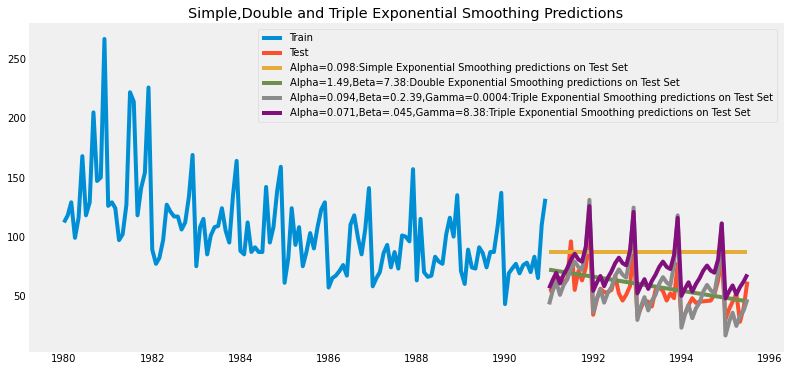

In [46]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(Train, label='Train')
plt.plot(Test, label='Test')

plt.plot(SES_predict, label='Alpha=0.098:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=1.49,Beta=7.38:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.094,Beta=0.2.39,Gamma=0.0004:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.071,Beta=.045,Gamma=8.38:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

##### Model Accuracy

In [47]:
print('TES_am RMSE:',mean_squared_error(Test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.189764216068276


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(Test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.071,Beta=.045,Gamma=8.38:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764


##### Inferences: 
1.Simple Exponential model with alpha value 0.098 the RMSE value is 36.79\
2.Double Exponential model  with Alpha=1.49,Beta=7.38 giving value of 15.26 which does not defining correctly to trend and seasonality.\
3.Triple Exponential Model with Alpha=0.094,Beta=0.2.39,Gamma=0.0004 values giving RMSE of 14.27.\
4.In Holt Winters model Exponential Smoothing model with Alpha=0.071,Beta=.045,Gamma=8.38 giving RMSE of 20.18\

Among all the the Triple Exponential Smoothing has performed the best to 14.27.It also clear defining the value, Trend and Seasonality of TS dataset.

### Building different models and comparing the accuracy metrics.

##### Model 1: Linear Regression
A time series regression forecasts a time series as a linear relationship with the independent variables. The linear regression model assumes there is a linear relationship between the forecast variable and the predictor variables

For this particular linear regression, we are going to regress the 'Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [49]:
train_time = [i+1 for i in range(len(Train))]
test_time = [i+43 for i in range(len(Test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [50]:
LinearRegression_train = Train.copy()
LinearRegression_test = Test.copy()

In [51]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0    43
1991-02-01  55.0    44
1991-03-01  66.0    45
1991-04-01  65.0    46
1991-05-01  60.0    47 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0    93
1995-04-01  52.0    94
1995-05-01  28.0    95
1995-06-01  40.0    96
1995-07-01  62.0    97 



In [52]:
# Defining the Linear Regression
lr = LinearRegression()

In [53]:
# Fitting of Train and test data
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

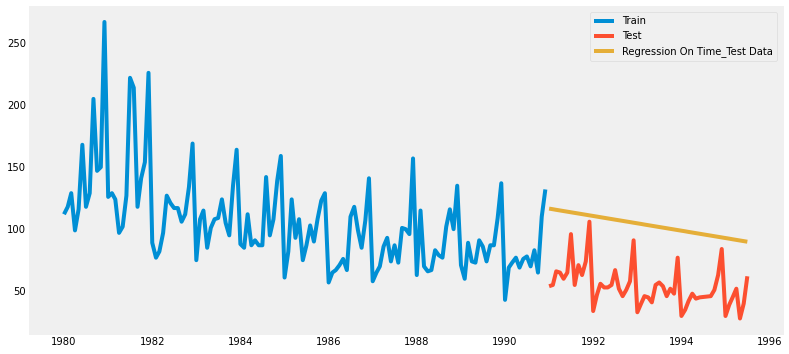

In [54]:
#Plotting the Linear Regression

test_predictions_model1  = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(12,6))
plt.plot( Train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [55]:
## Test Data - RMSE
rmse_model1_test = metrics.mean_squared_error(Test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 51.433


In [56]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312


##### Inferences:
The Regression Model having the RMSE value 51.43 which are higher among all till now.
    

##### Model 2: Naive Approach:  y^t+1=yt

The Naive Bayes method is a classification algorithm that uses Bayes’ theorem to predict the probability of a class given a set of features. However, there is a method called Naive Method which uses the most recent value as the forecasted value for the next time step. The assumption followed by this method is that its value tomorrow is equal to its value today    

In [57]:
NaiveModel_train = Train.copy()
NaiveModel_test = Test.copy()

In [58]:
NaiveModel_test['naive'] = np.asarray(Train['Rose'])[len(np.asarray(Train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

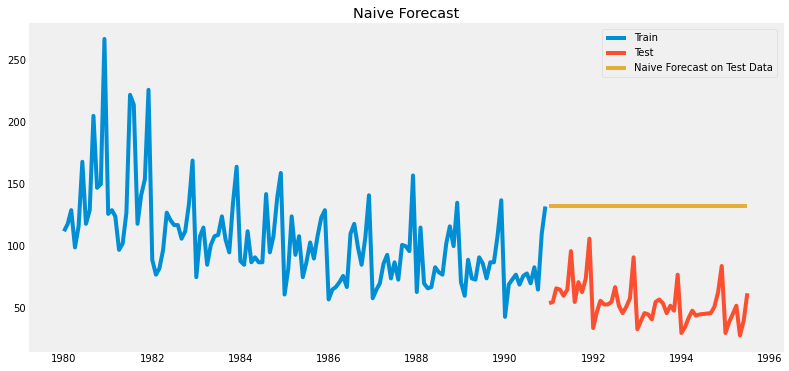

In [59]:
plt.figure(figsize=(12,6))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(Test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [60]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(Test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 79.719


In [61]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773


###### Inferences:
The Regression Model having the RMSE value 79.71 because this Model predict on basis of last data. The RMSE value is higher among all  models till now.

### Simple Average Model

The method is very simple: average the data by months or quarters or years and them calculate the average for the period. Then find out, what percentage it is to the grand average.

In [62]:
SimpleAverage_train = Train.copy()
SimpleAverage_test = Test.copy()

In [63]:
SimpleAverage_test['mean_forecast'] = Train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


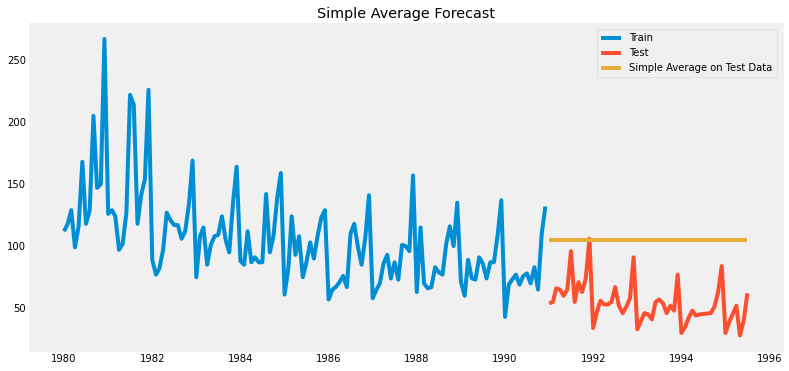

In [64]:
plt.figure(figsize=(12,6))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [65]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(Test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [66]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570


##### Inferance:
The RMSE value of RMSE of Simple average model are slighly abobe the Regression model.

### Moving Average Forecast
The moving average is a statistical method used for forecasting long-term trends.The technique represents taking an average of a set of numbers in a given range while moving the range.
In simple terms, a moving average graph takes the average of several different points in the data set and then plots it over time.

Two main types of moving averages:
   1) Centered moving average - calculated as the average of raw observations at, before and after time, t.\
   2) Trailing moving average - uses historical observations and is used on time series forecasting.
   
The rolling() function on the Series Pandas object will automatically group observations into a window.


The main advantage of the moving average method is that it takes into account all previous values when predicting future values. This helps to reduce the effect of outliers when making predictions and also makes it easier to identify seasonal patterns in a time-series data set.
The moving average method is an effective tool for short-term forecasting due to its flexibility and ease of use. Its ability to take into account all past values when making predictions ensures accuracy while its ability to identify seasonal patterns means that it can be used effectively for long-term forecasting too

This algorithm helps us to forecast new observations based on a time series. This algorithm uses smoothing methods. The moving average algorithm is used only on time series that DOESN'T have a trend. This method is by far the easiest and it consists of making the arithmethic mean of the last ,,n'' observations contained by the time series to forecast the next observation. We use the following       
                
                formula:MA_(t+1)=(∑_(i=t-n)^t x_i )/n

We need to find the optimal number ,,n" of observation to be used in the forecast. We can find it by checking the square error mean of multiple ,,n'' observations. We should start at 3 observations and we can go up to half of the data set size + 1.

In [67]:
# Making copy of Test and test Data
MovingAverage = df.copy()

MovingAverage_train = Train.copy()
MovingAverage_test = Test.copy()
MovingAverage_train.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [68]:
# Moving Average forecast
MovingAverage_test['moving_avg_forecast'] = df['Rose'].rolling(12).mean()
print(MovingAverage_test)

                  Rose  moving_avg_forecast
YearMonth                                  
1991-01-01   54.000000            79.666667
1991-02-01   55.000000            78.500000
1991-03-01   66.000000            77.916667
1991-04-01   65.000000            76.916667
1991-05-01   60.000000            76.166667
1991-06-01   65.000000            75.250000
1991-07-01   96.000000            76.750000
1991-08-01   55.000000            75.500000
1991-09-01   71.000000            74.500000
1991-10-01   63.000000            74.333333
1991-11-01   74.000000            71.333333
1991-12-01  106.000000            69.166667
1992-01-01   34.000000            67.500000
1992-02-01   47.000000            66.833333
1992-03-01   56.000000            66.000000
1992-04-01   53.000000            65.000000
1992-05-01   53.000000            64.416667
1992-06-01   55.000000            63.583333
1992-07-01   67.000000            61.166667
1992-08-01   52.000000            60.916667
1992-09-01   46.000000          

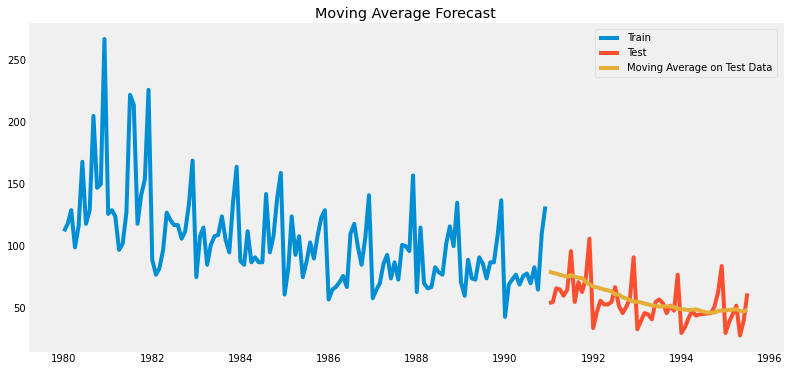

In [69]:
# Plotting The moving Avarage of Sparkling and forecast
plt.figure(figsize=(12,6))
MovingAverage_test['moving_avg_forecast'] = df['Rose'].rolling(12).mean()
plt.plot(MovingAverage_train['Rose'], label='Train')
plt.plot(MovingAverage_test['Rose'], label='Test')
plt.plot(MovingAverage_test['moving_avg_forecast'], label='Moving Average on Test Data')
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.grid();

In [70]:
## Test Data - RMSE 

rmse_model4_test = metrics.mean_squared_error(Test['Rose'],MovingAverage_test['moving_avg_forecast'],squared=False)
print("For Moving  Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Moving  Average forecast on the Test Data,  RMSE is 53.461


In [71]:
# Comparing the RSMEs 
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['Moving Average'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052


##### Inferences:
The RMSE value on simple moving average is 15.23 which is very close to Double exponential model(15.27)

In [72]:
# Trailing Moving Avarage by loop method
window_sizes = [2, 4, 6, 9]
for window_size in window_sizes:
    column_name = f'Trailing_{window_size}'
    MovingAverage[column_name] = MovingAverage['Rose'].rolling(window_size).mean()

In [73]:
#Printing the Moving average
(print(MovingAverage),3)

             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
...           ...         ...         ...         ...         ...
1995-03-01   45.0        42.0       49.50   52.000000   49.888889
1995-04-01   52.0        48.5       41.50   52.166667   50.629630
1995-05-01   28.0        40.0       41.00   46.333333   48.666667
1995-06-01   40.0        34.0       41.25   39.000000   48.000000
1995-07-01   62.0        51.0       45.50   44.333333   49.222222

[187 rows x 5 columns]


(None, 3)

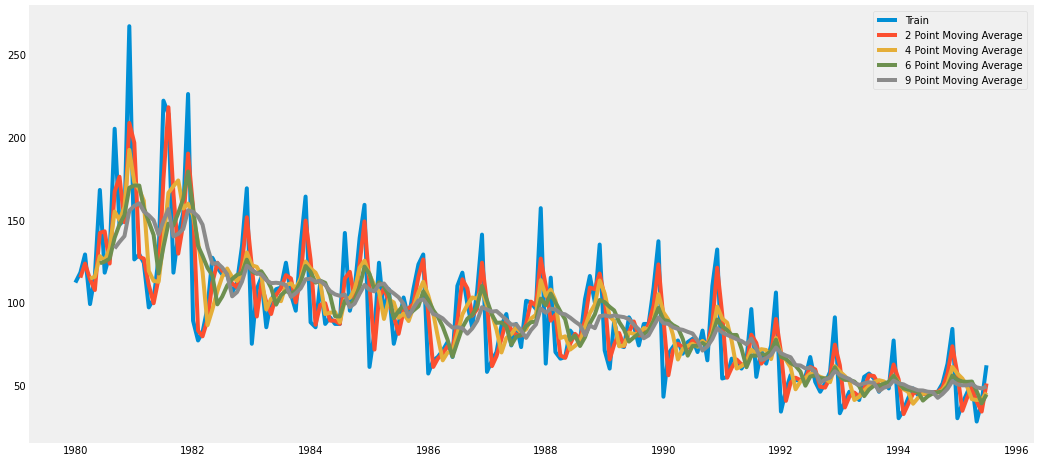

In [74]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

### Train Test Split

In [75]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[df.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[df.index.year >= 1991]


#Train = df[df.index.year < 1991]
#Test = df[df.index.year >= 1991]

In [76]:
print(trailing_MovingAverage_train['Trailing_2'].iloc[-1])
print(trailing_MovingAverage_test['Trailing_2'].iloc[-1])

121.0
51.0


In [77]:
# Checking last 5 value of trailing 2
trailing_MovingAverage_train['Trailing_2'].tail()

YearMonth
1990-08-01     74.0
1990-09-01     76.5
1990-10-01     74.0
1990-11-01     87.5
1990-12-01    121.0
Name: Trailing_2, dtype: float64

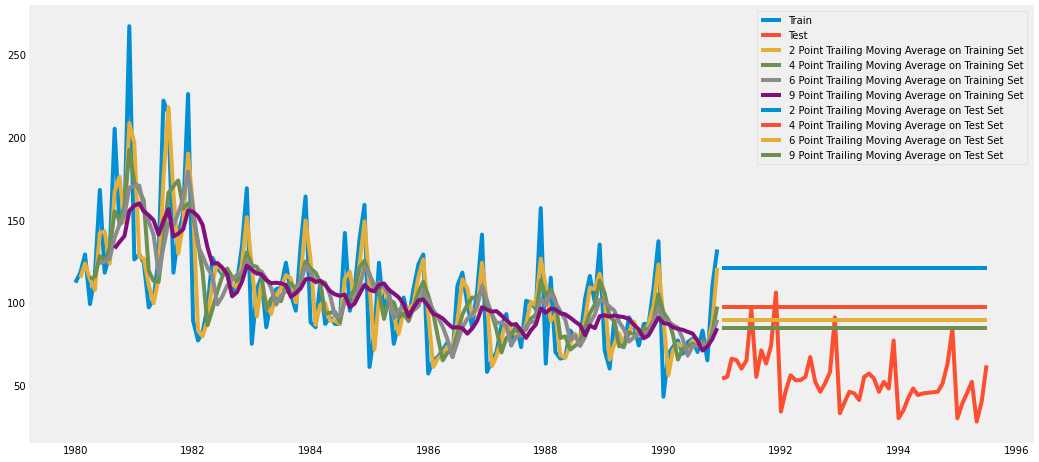

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

trailing_MovingAverage_test['Trailing_2'] = trailing_MovingAverage_train['Trailing_2'].iloc[-1]
trailing_MovingAverage_test['Trailing_4'] = trailing_MovingAverage_train['Trailing_4'].iloc[-1]
trailing_MovingAverage_test['Trailing_6'] = trailing_MovingAverage_train['Trailing_6'].iloc[-1]
trailing_MovingAverage_test['Trailing_9'] = trailing_MovingAverage_train['Trailing_9'].iloc[-1]

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [79]:
# Model Evaluation on Test Data
## Test Data - RMSE --> 2 point Trailing MA
#rmse = math.sqrt(((MovingAverage['Sparkling'] - MovingAverage[column_name]) ** 2).mean())

rmse_model5_test_2 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model6_test_4 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model7_test_6 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model7_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model8_test_9 = metrics.mean_squared_error(Test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Test Data,  RMSE is %3.3f " %(rmse_model8_test_9))

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 68.970
For 4 point Moving Average Model forecast on the Test Data,  RMSE is 46.404
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 39.126
For 9 point Moving Average Model forecast on the Test Data,  RMSE is 34.411 


###### Inference:
The RMSE values are above 34 in all label of data but among all trai;ing average the value of RMSE is lowes for 9th point 34.41.

In [80]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_test_2,rmse_model6_test_4
                                          ,rmse_model7_test_6,rmse_model8_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052
2pointTrailingMovingAverage,68.970159
4pointTrailingMovingAverage,46.403626


In [81]:
window_sizes = [2, 4, 6, 9]
for window_size in window_sizes:
    column_name = f'Trailing_{window_size}'
    MovingAverage[column_name] = MovingAverage['Rose'].rolling(window_size).mean()

In [82]:
(print(MovingAverage),3)

             Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0      114.50         NaN         NaN
1980-05-01  116.0       107.5      115.50         NaN         NaN
...           ...         ...         ...         ...         ...
1995-03-01   45.0        42.0       49.50   52.000000   49.888889
1995-04-01   52.0        48.5       41.50   52.166667   50.629630
1995-05-01   28.0        40.0       41.00   46.333333   48.666667
1995-06-01   40.0        34.0       41.25   39.000000   48.000000
1995-07-01   62.0        51.0       45.50   44.333333   49.222222

[187 rows x 5 columns]


(None, 3)

### Q5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.

### Checking  for stationarity of the whole Time Series data.
### Stationarity
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

Stationarity means that the autocorrelation of lag ‘k’ depends on k, but not on time t.

Let Xt denote the time series at time t.

Autocorrelation of lag k is the correlation between Xt and X(t−k) </font>

Strong stationarity: is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.\
Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time
Stationarity is important as non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

### Check for Stationarity

There are multiple tests that can be used to check stationarity.

     ADF( Augmented Dicky Fuller Test)
     KPSS
     PP (Phillips-Perron test)
Let's just perform the ADF which is the most commonly used one

Dickey-Fuller Test - Dicky Fuller Test on the timeseries is run to check for stationarity of data.

Null Hypothesis H0: Time Series is non-stationary.\
Alternate Hypothesis Ha: Time Series is stationary.

So Ideally if p-value < 0.05 then null hypothesis: TS is non-stationary is rejected else the TS is non-stationary is failed to be rejected .



In [83]:
## Test for stationarity of the series - Dicky Fuller test
rcParams['figure.figsize'] = 16,6

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=2).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=2).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

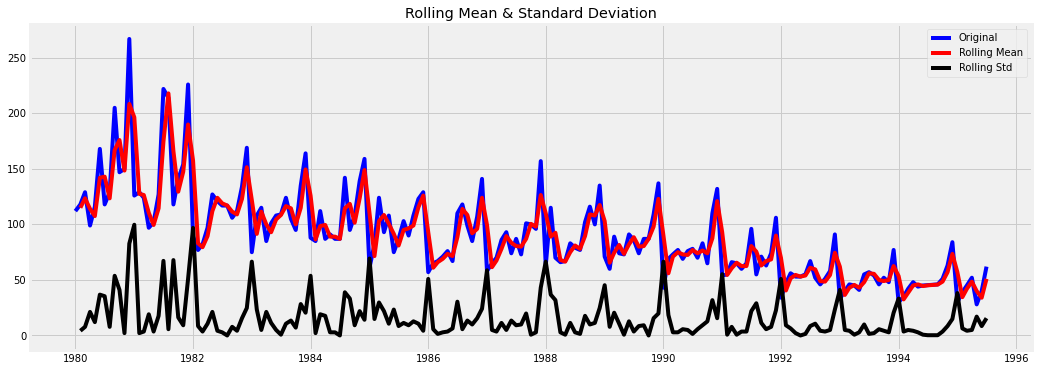

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [84]:
test_stationarity(df['Rose'])

##### Insights:  
In this case, since the p-value is 0.343101 which is greater than 0.05, we cannot reject the null hypothesis that the time series has a unit root and conclude that it is non-stationary.

#### How to Make a Time Series Stationary ? - Differencing 'd'
Differencing 'd' is done on a non-stationary time series data one or more times to convert it into stationary.
(d=1) 1st order differencing is done where the difference between the current and previous (1 lag before) series is taken and then checked for stationarity using the ADF(Augmented Dicky Fueller) test. If differenced time series is stationary, we proceed with AR modeling. Else we do (d=2) 2nd order differencing, and this process repeats till we get a stationary time series

1st order differencing equation is : yt=yt−yt−1 \
2nd order differencing equation is : yt=(yt−yt−1)−(yt−1−yt−2)
 and so on…</font> \
The variance of a time series may also not be the same over time. To remove this kind of non-stationarity, we can transform the data. If the variance is increasing over time, then a log transformation can stabilize the variance.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

Text(0, 0.5, 'Rose')

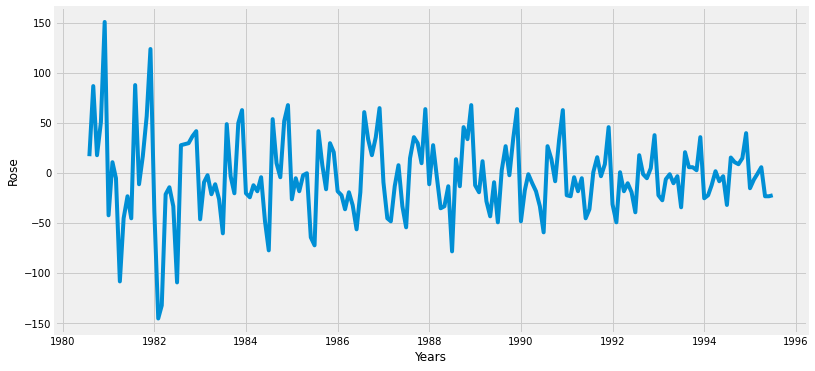

In [85]:
#Performing differencing ( d=1 ) as the data is non-stationary
rcParams['figure.figsize'] = 12,6
plt.plot(df['Rose'].diff(periods=7))
plt.xlabel('Years')
plt.ylabel('Rose')

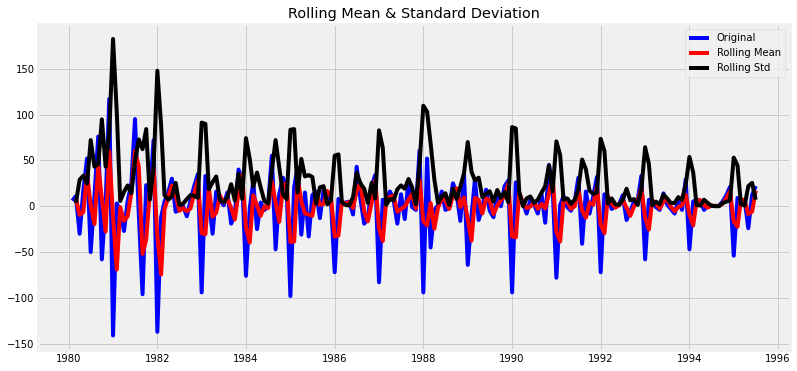

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [86]:
#Performing differencing ( d=1 ) as the data is non-stationary
rcParams['figure.figsize'] = 12,6
test_stationarity(df['Rose'].diff().dropna())

Now, We can see that at  𝛼= 0.05 the Time Series is indeed stationary.

#### Plot the Autocorrelation function plots on the whole data.

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

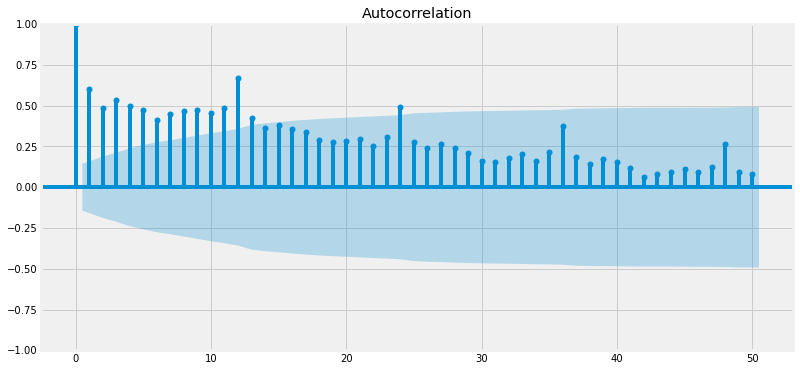

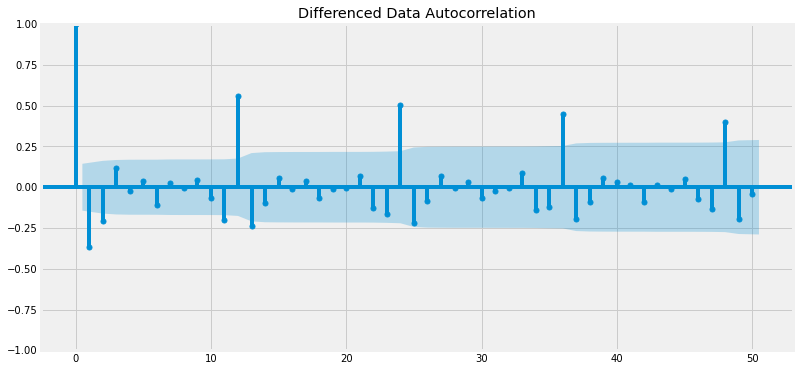

In [88]:
#Plotting Auto correction and Differnce in Autocorrelation
rcParams['figure.figsize'] = 12,6
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

### QN 6 Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto Regressive(AR) Models
Autoregression means regression of a variable on itself which means Autoregressive models use previous time period values to predict the current time period values.     
An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc\
The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.\

One of the fundamental assumptions of an AR model is that the time series is assumed to be a stationary process.
An AR(p) model (Auto-Regressive model of order p) can be written as:

     yt =   φ1yt−1+φ2yt−2+……+φpyt−p+εt
     
εt is an error term which is an independent and identically distributed random variable (or in other words, a white noise) with the parameters mean = 0 and standard deviation = σ\
The φ are regression coefficients multiplied by lagged time series variable, which captures the effect of the input variable on the output, provided intermediate values do not change.


### Choose the order 'p' of AR model
  We look at the Partial Autocorrelations of a stationary Time Series to understand the order of Auto-Regressive models.
  For an AR model, 2 ways to identify order of 'p':
1) **PACF Approach** : the PACF method where the (Partial Auto Correlation Function) values cut off and become zero after a certain lag. PACF vanishes if there is no regression coefficient that far back. The cut-off value where this happens can be taken as the order of AR as ‘p’. This can be seen from a PACF plot.

If the 2nd PACF vanishes (cut off in PACF) then the 2nd coefficient is not considered and thus ‘p’ is 1.\
If the 3rd PACF vanishes (cuts off in PACF) then the 3rd coefficient is not considered and thus ‘p’ is 2 and so on…\
Partial Autocorrelation of order 2 = Partial autocorrelation of lag 2 = Correlation between Xt and Xt−2 holding Xt−1 fixed.
2) **Lowest AIC Approach** : **the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘p’ is considered.**

### Moving Average(MA) Models
Moving average model considers past residual values to predict the current time period values. These past residuals are past prediction errors.
For a MA model, the residual or error component is modeled.
The moving average model MA(q) of  order q can be represented as:

        yt=εt+θ1εt−1+……+θqεt−q
        
Where yt time series variable, θ are numeric coefficients multiplied to lagged residuals and ε is the residual term considered as a purely random process with mean 0, variance σ2 and  Cov(εt−1,εt−q)= 0.


### Choose the order 'q' of MA model
We look at the Autocorrelations of a stationary Time Series to understand the order of Moving Average models.
For a MA model,
1) **ACF Approach** : ACF (Autocorrelation Function) values cut off at a certain lag. ACF vanishes, and there are no coefficients that far back; thus, the cut-off value where this happens is taken as the order of MA as ‘q’. This can be seen from the ACF plot.

2) **Lowest AIC Approach** : the lowest Akaike Information Criteria (AIC) value compared among different orders of ‘q’ is considered. 

#### Using the log transformed series as there is variance in the data

In [89]:
Train_log = np.log10(Train['Rose'])
#Log transformation on the training data to make the time series stationary as we 

In [90]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

### ARIMA models
Auto Regressive Integrated Moving Average is a way of modeling time series data for forecasting or predicting future data point
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

ARIMA(1,0,0)

        yt = a1yt-1 + ϵt

ARIMA(1,0,1)

       yt = a1yt-1 + ϵt + b1ϵt-1

ARIMA(1,1,1)

       Δyt = a1Δyt-1 + ϵt + b1ϵt-1 where Δyt = yt - yt-1
 
Improving AR Models by making Time Series stationary through Moving AVerage Forecasts\
ARIMA models consist of 3 components:-\
AR model: The data is modeled based on past observations.\
Integrated component: Whether the data needs to be differenced/transformed.\
MA model: Previous forecast errors are incorporated into the model.

### Building an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

In [120]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [92]:
#AR Model building to estimate best 'p' ( Lowest AIC Approach )
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [93]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(Train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748333
ARIMA(0, 1, 2) - AIC:1279.671528853574
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380066
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341604885
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264484


In [94]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [121]:
# ARIMA Summary
auto_ARIMA = ARIMA(Train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -636.836
Date:                Sun, 09 Apr 2023   AIC                           1279.672
Time:                        16:29:29   BIC                           1288.297
Sample:                    01-01-1980   HQIC                          1283.176
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6970      0.072     -9.689      0.000      -0.838      -0.556
ma.L2         -0.2042      0.073     -2.794      0.005      -0.347      -0.061
sigma2       965.8407     88.305     10.938      0.0

#### Predicting  on the Test Set using this model and evaluate the model

In [96]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(Test))

In [97]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(Test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

37.30647972368469


In [98]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052
2pointTrailingMovingAverage,68.970159
4pointTrailingMovingAverage,46.403626


Insights:

### Building an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC)

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

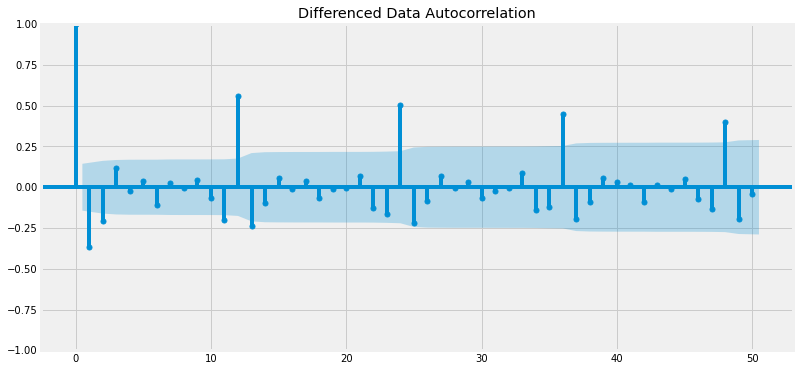

In [99]:
#Plotting diffence data Autocorrelation
rcParams['figure.figsize'] = 12,6
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

####  Insight : 
We see that there can be a seasonality of 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =12 and thus using the same 

#### Setting the seasonality as 12 to estimate parametrs using auto SARIMA model.

In [122]:
# Seasonality as 12 to estimate parametrs using auto SARIMA mode
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [101]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [102]:

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207425
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.43752963809
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938631
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575222
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697547
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945737
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383963
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918012
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094645
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483309107
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535747
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461668
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260721836
SARIMA(0, 1, 2)x(0, 0, 0, 

In [123]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.871767
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


#### Inferences: 
Criteria to choose the best fit model is the lowest/minimum AIC value
For ARIMA(p, d, q) × (P, D, Q)S, we got SARIMAX(0, 1, 2)x(2, 0, 2, 12)model with the least AIC of 887.937509

Here,

    p = non-seasonal AR order = 0,
    d = non-seasonal differencing = 1,
    q = non-seasonal MA order = 2,
    P = seasonal AR order = 2,
    D = seasonal differencing = 0,
    Q = seasonal MA order = 2,
    S = time span of repeating seasonal pattern = 12

In [104]:
# Generating Summary of SARIMA
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(Train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 09 Apr 2023   AIC                            887.938
Time:                                    16:14:46   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    190.063     -0.004      0.996    -373.359     371.673
ma.L2         -0.1573     29.860   

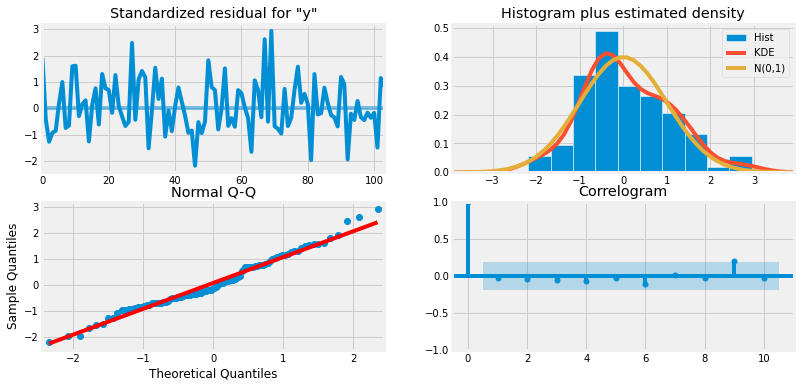

In [124]:
#Plotting the assumption on Residuals
rcParams['figure.figsize'] = 12,6
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Insight: From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots. 

#### Predict on the Test Set using this model and evaluate the model.

In [106]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(Test))

In [107]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867265,15.928501,31.647976,94.086554
1,70.541190,16.147659,38.892360,102.190021
2,77.356411,16.147657,45.707585,109.005237
3,76.208814,16.147657,44.559988,107.857640
4,72.747398,16.147657,41.098572,104.396224


In [108]:
# RSME value on Test data
rmse = mean_squared_error(Test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)


26.928362237820917


In [109]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052
2pointTrailingMovingAverage,68.970159
4pointTrailingMovingAverage,46.403626


### Evaluate the model on the whole and predict 12 months into the future 
Time Series Assumptions 
Table of Contents

Some of the most common assumptions made for time series are based on the common sense. But always Keep in mind one thing

Very long range forecasts does not work well !!

1.Forecast is done by keeping in mind that the market and the other conditions are not going to change in the future.\
2.There will be not any change in the market.\
3.But the change is gradual and not a drastic change.\
4.Situations like recession in 2008 US market will send the forecasts into a tizzy.\
5.Events like demonetization would throw the forecasts into disarray Based on the data available ,\
 we should not try to forecast for more than a few periods ahead.

### Building the most optimum model on the Full Data.
We have used the number of methods to get the model having minimum RMSE.In This on the basis of RSME table we find Triple Exponential Smoothining Modeling is perfect for this solution with the Triple Exponential Smoothing with multiplicative seasonality with the following parameters: 
 
            𝛼 = 0.094, 
            𝛽 = 2.32 and 
            𝛾  = 0.0004
            

In [110]:
#Ruuning Model on Full dataset
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.09467987567540882,
                                                                 smoothing_trend=2.31999683285252,
                                                                 smoothing_seasonal=0.0004175285691922314)

In [111]:
RMSE_fullmodel1 = metrics.mean_squared_error(df['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE of the TES Full Model',RMSE_fullmodel1)

RMSE of the TES Full Model 22.411790148276328


In [112]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

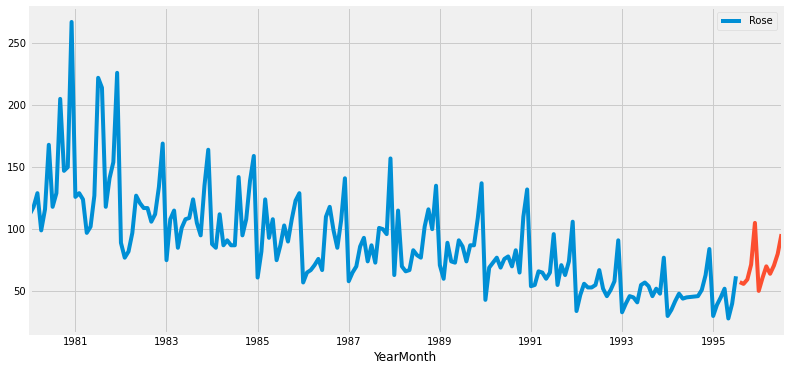

In [113]:
df.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [114]:
np.std(fullmodel1.resid,ddof=1)

22.471948996652802

In [115]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,13.227126,57.272146,101.317167
1995-09-01,11.834505,55.879525,99.924545
1995-10-01,15.388069,59.433089,103.478109
1995-11-01,27.441866,71.486886,115.531906
1995-12-01,60.988252,105.033272,149.078292


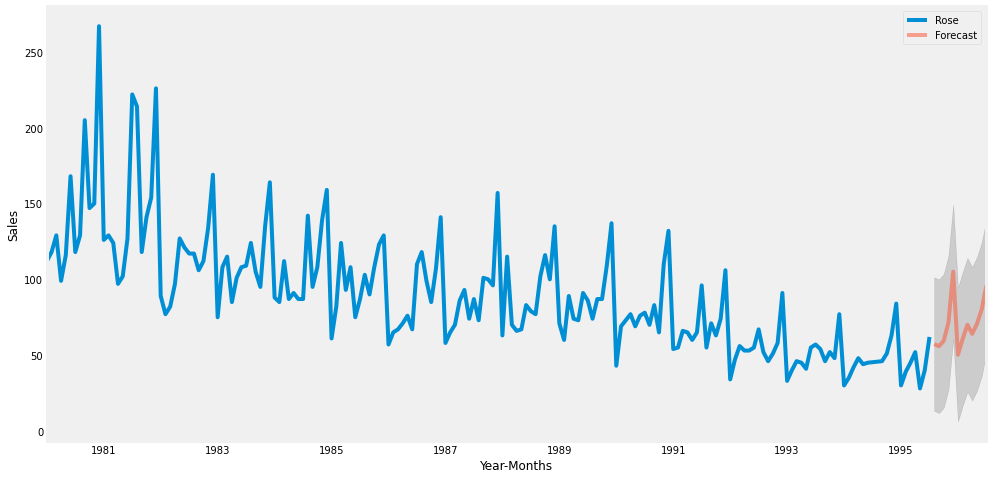

In [116]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [117]:
# Calculate the RMSE on Full Data
resultsDf_temp = pd.DataFrame({'Test RMSE': [RMSE_fullmodel1]}
                           ,index=['RMSE of the TES Full Model'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052
2pointTrailingMovingAverage,68.970159
4pointTrailingMovingAverage,46.403626


#### Inferences:
TES stands as best model to determine a good forecast on the full Rose TS dataset.22.411 is the RMSE in on th full dataset.Which is lower than the most of traing and test models performed here.
CI Intervals : The lower_CI and upper_CI columns represent the lower and upper bounds of the confidence interval for the prediction column respectively. A confidence interval is a range of values that we can be confident contains the true population parameter with a certain degree of certainty. Our case we have considered the confidence level is 95%.Which is plotted as well.

So, for example, if we take the first row of your data (1995-08-01), we can say that we are 95% confident that the true value of prediction lies between 13.227126 and 101.317167



### QN-8 Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [125]:
# Generating the RSME summary tables on basis on all models
resultsDf

,Test RMSE
"Alpha=0.098,SES",36.796236
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
Regression On Time,51.433312
Naive Model,79.718773
Simple Average,53.460570
Moving Average,15.236052
2pointTrailingMovingAverage,68.970159
4pointTrailingMovingAverage,46.403626


In [126]:
#Sorting the RMSE Values in Ascending Order
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
"Alpha=0.094,Beta=0.2.39,Gamma=0.0004:TES",14.278440
Moving Average,15.236052
"Alpha=1.49,Beta=7.38:DES",15.268957
"Alpha=0.071,Beta=.045,Gamma=8.38:TES",20.189764
RMSE of the TES Full Model,22.411790
"SARIMA(0,1,2)(2,0,2,12)",26.928362
9pointTrailingMovingAverage,34.410938
"Alpha=0.098,SES",36.796236
"ARIMA(2,1,2)",37.306480
6pointTrailingMovingAverage,39.126446
